<a href="https://colab.research.google.com/github/GArdennes/Research-Studies/blob/main/AUS_Customer_Service_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
filepath = '/content/drive/MyDrive/DATA FOR RESEARCH/customer-service-requests-with-digital-channel-information_V02.xlsx'
df = pd.read_excel(filepath)
df.head()

In [ ]:
#identify variables with null values
df.isnull().any()

service_type    False
date_opened     False
date_closed      True
status          False
case_origin     False
suburb          False
dtype: bool

In [ ]:
df.head()

In [ ]:
#Display suburb names
df['suburb'].unique()

array(['Kensington', 'Melbourne', 'Carlton', 'Docklands',
       'East Melbourne', 'Parkville', 'Southbank', 'West Melbourne',
       'North Melbourne', 'South Yarra', 'South Wharf', 'carlton',
       'Port Melbourne', 'Melbourne CBD', 'Kensignton', 'Princes Hill',
       'Richmond', 'Southgate Promenade', 'West Melb', 'kensington',
       'Carlton North', 'north melbourne', 'west melb', 'North melbourne',
       'Deer Park', 'melbourne', 'Batman Ave', 'Fitzroy', 'MELBOURNE',
       'North Adelaide', 'South Melbourne', 'Melb CBD', 'Jolimont',
       'Flemington', 'Brunswick', 'Elizabeth', 'West melbourne',
       'Royal Park', 'west melbourne', 'Prahran', 'Nth melbourne',
       'CARLTON', 'EAST MELBOURNE', 'Reservoir'], dtype=object)

In [ ]:
#Change all suburb names to title format
def to_title(suburb):
  try:
    suburb = suburb.title()
    return suburb
  except:
    return np.nan

df['suburb'] = df['suburb'].apply(to_title)
df['suburb'].value_counts()


Melbourne              6778
North Melbourne        2291
Carlton                2136
Kensington             1544
West Melbourne         1380
East Melbourne         1233
Docklands              1150
Southbank              1129
Parkville              1070
South Yarra             735
Port Melbourne           35
Melbourne Cbd            29
Carlton North            24
Princes Hill             12
South Wharf              11
Melb Cbd                 10
Fitzroy                   8
West Melb                 6
Flemington                5
South Melbourne           3
Richmond                  2
Elizabeth                 1
Nth Melbourne             1
Royal Park                1
Prahran                   1
Brunswick                 1
Southgate Promenade       1
Jolimont                  1
North Adelaide            1
Batman Ave                1
Deer Park                 1
Kensignton                1
Reservoir                 1
Name: suburb, dtype: int64

In [ ]:
#Count service types by suburb
df.groupby(['suburb', 'service_type']).size()

suburb          service_type                 
Batman Ave      Graffiti Removal Request           1
Brunswick       Infringement Review - Parking      1
Carlton         Abandoned Vehicles                40
                Graffiti Removal Request         477
                Illegally Dumped Rubbish         406
                                                ... 
West Melbourne  Ratepayer waste                   20
                Request for Parking Officer      697
                Rough Sleeping                    33
                Syringe Management                12
                Tree Maintenance Request          98
Length: 136, dtype: int64

<Axes: title={'center': 'Overall Service Type Frequency'}>

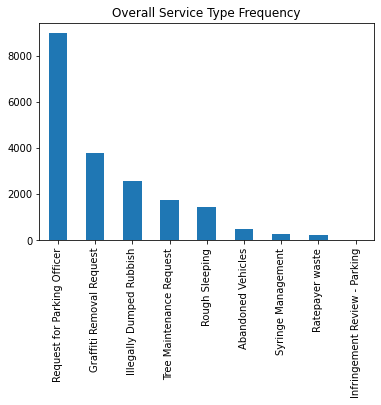

In [ ]:
#Disply frequency of overall complaint types
df['service_type'].value_counts().plot(kind = 'bar', title = 'Overall Service Type Frequency')

In [ ]:
dc=df.dropna(subset=['suburb'], inplace=True)

In [ ]:
#Extract relevant features for analysis
X = df[['suburb']]
y = df['service_type']

In [ ]:
X.isnull().sum()

suburb    0
dtype: int64

In [ ]:
y.isnull().sum()

0

In [ ]:
X = X.fillna('Not Given')

In [ ]:
#Encode the suburbs so that it can be used as input
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [ ]:
#Split the data into training set and a testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
#K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
model = SVC()

In [ ]:
#Training the model using the training set
model.fit(X_train, y_train)

In [ ]:
# Predict the target values of the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4516704922213721
